In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # importing neccesary ,libraries

In [2]:
Data=pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
Data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
Data.shape #Checking the rows and columns

(1470, 35)

In [5]:
Data.info() #Checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
Data['Attrition'].unique() #Checking the object data type

array(['Yes', 'No'], dtype=object)

In [7]:
Data['Attrition']=Data['Attrition'].replace({'No':0,'Yes':1})

In [8]:
Data['BusinessTravel'].unique() #Checking the object data type

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [9]:
Data['BusinessTravel']=Data['BusinessTravel'].replace({'Travel_Rarely':0,'Travel_Frequently':1,'Non-Travel':2})

In [10]:
Data['Department'].unique() #Checking the object data type

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [11]:
Data['Department']=Data['Department'].replace({'Sales':0,'Research & Development':1,'Human Resources':2})

In [12]:
Data['EducationField'].unique() #Checking the object data type

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
OE= OrdinalEncoder()
Encode= OE.fit_transform(Data[['EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']])
Encode

array([[1., 0., 7., 2., 0., 1.],
       [1., 1., 6., 1., 0., 0.],
       [4., 1., 2., 2., 0., 1.],
       ...,
       [1., 1., 4., 1., 0., 1.],
       [3., 1., 7., 1., 0., 0.],
       [3., 1., 2., 1., 0., 0.]])

In [15]:
Data[['EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']]=Encode

In [16]:
Data.info() #Checking the data types after encoding the object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   float64
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [17]:
Data.isnull().sum() #Checking if there is no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
Data['Attrition'].value_counts() #Checking the count of the target data

0    1233
1     237
Name: Attrition, dtype: int64

In [19]:
# Class is imbalanced, hence needs to be resampled

In [20]:
from sklearn.utils import resample

In [21]:
not_attrition=Data[Data.Attrition==0]
attrition=Data[Data.Attrition==1]

In [22]:
attrition_upsamples=resample(attrition,replace=True,n_samples=len(not_attrition),random_state=27)

In [23]:
upsampled=pd.concat([not_attrition,attrition_upsamples])

In [24]:
Data=upsampled

In [25]:
Data['Attrition'].value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

In [26]:
Data.describe() #Checking the statistics

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.0,2466.000000,...,2466.000000,2466.0,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,35.826845,0.500000,0.380779,772.768856,0.696675,9.819951,2.872668,2.286699,1.0,1012.482157,...,2.662206,80.0,0.673155,10.021087,2.758313,2.727494,6.175588,3.691809,2.031630,3.611111
std,9.723376,0.500101,0.629063,399.353039,0.548319,8.315387,1.014303,1.367591,0.0,596.395382,...,1.102389,0.0,0.851335,7.734145,1.279255,0.757083,6.043889,3.537213,3.115331,3.499177
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,428.000000,0.000000,2.000000,2.000000,1.000000,1.0,492.000000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,34.000000,0.500000,0.000000,740.000000,1.000000,8.000000,3.000000,2.000000,1.0,1013.500000,...,3.000000,80.0,0.000000,8.000000,3.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,42.000000,1.000000,1.000000,1122.000000,1.000000,16.000000,4.000000,3.000000,1.0,1534.000000,...,4.000000,80.0,1.000000,13.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [27]:
# There is a huge difference in mean and standard deviation
# There is a huge difference in maximum and minimum values

In [28]:
X=Data.drop('Attrition',axis=1)
Y=Data['Attrition'] #Seperating the target and classes

In [29]:
X.skew().sort_values(ascending=False) #Checking the skewness

YearsSinceLastPromotion     2.053703
YearsAtCompany              1.953785
PerformanceRating           1.845972
MonthlyIncome               1.572395
BusinessTravel              1.419887
TotalWorkingYears           1.249564
StockOptionLevel            1.215933
JobLevel                    1.193829
YearsInCurrentRole          1.028863
NumCompaniesWorked          0.993270
YearsWithCurrManager        0.913763
DistanceFromHome            0.810271
PercentSalaryHike           0.805227
EducationField              0.547878
OverTime                    0.489577
TrainingTimesLastYear       0.479354
Age                         0.470072
DailyRate                   0.115389
MonthlyRate                 0.052851
HourlyRate                  0.033889
EmployeeNumber              0.025146
EmployeeCount               0.000000
StandardHours               0.000000
Over18                      0.000000
Department                 -0.011784
JobSatisfaction            -0.178895
EnvironmentSatisfaction    -0.221593
R

In [32]:
#The skewness for lot of values are already zero, if they are further transformed there can be an issue of null values

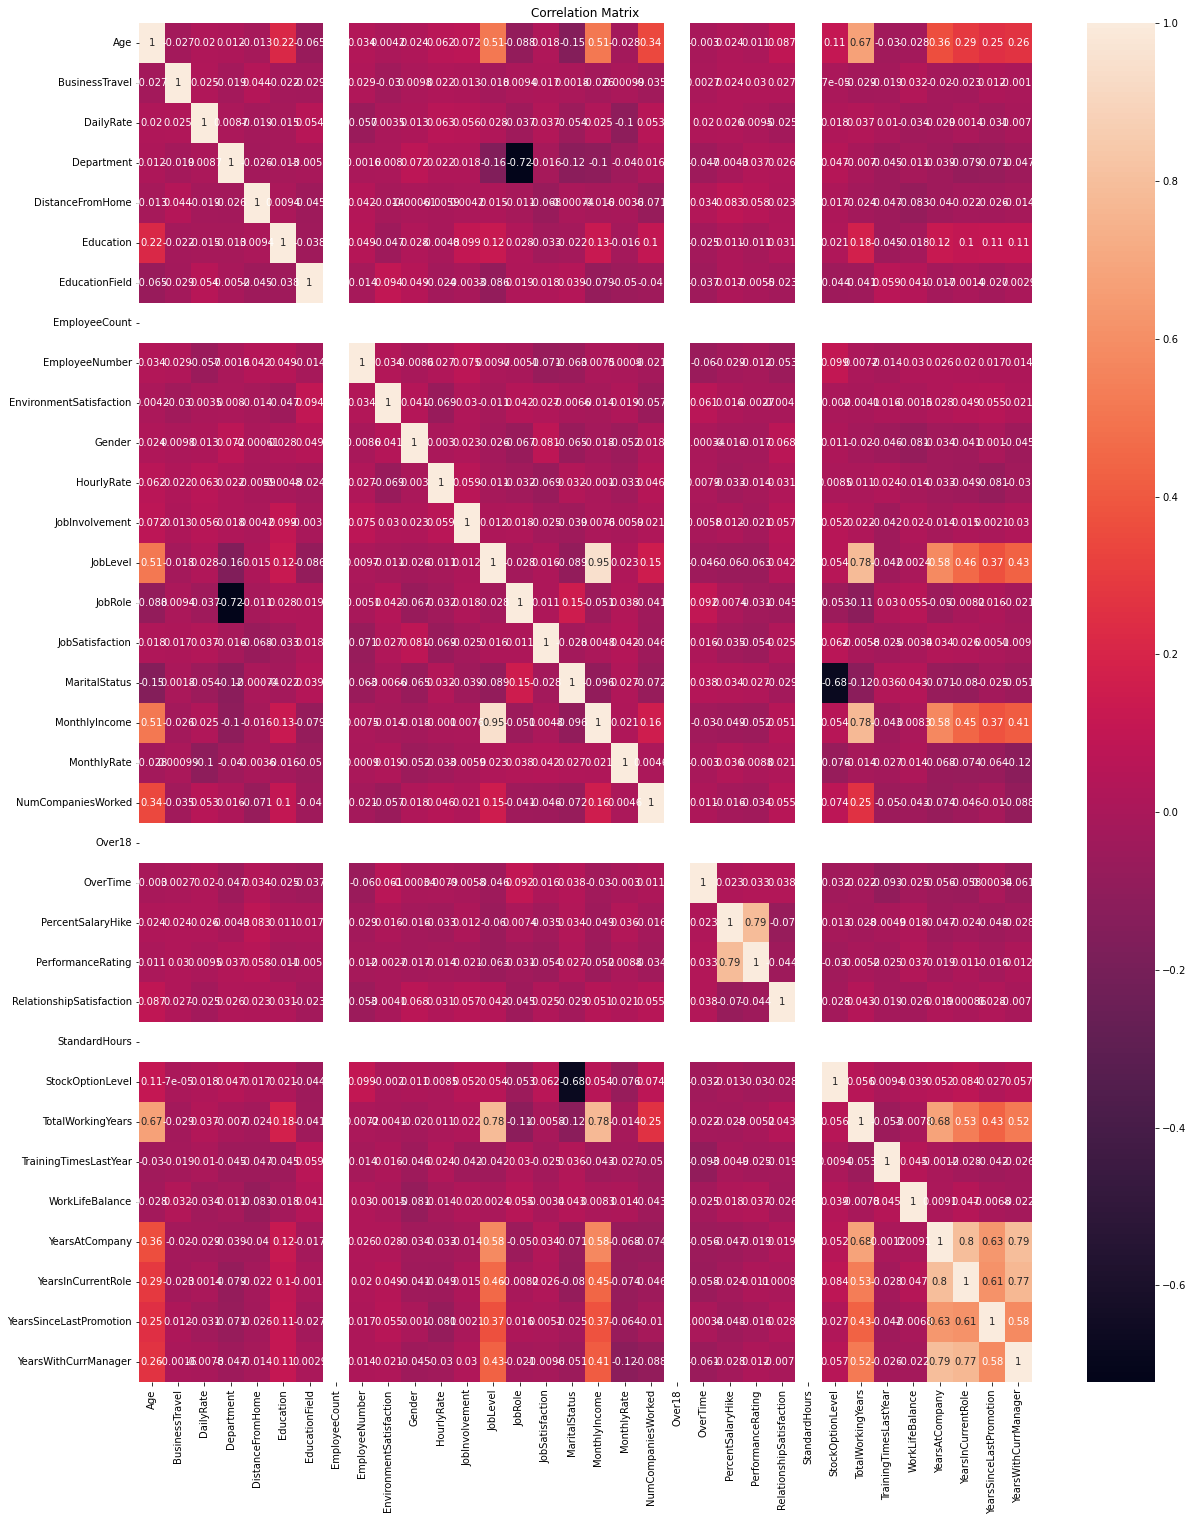

In [33]:
corr_mat=X.corr()
plt.figure(figsize=[20,25])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [34]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Age,2.060862
1,BusinessTravel,1.015451
2,DailyRate,1.048536
3,Department,2.372428
4,DistanceFromHome,1.053259
5,Education,1.080116
6,EducationField,1.044825
7,EmployeeCount,0.000000
8,EmployeeNumber,1.043550
9,EnvironmentSatisfaction,1.042319


In [35]:
#Looking the VIF data- Few columns can be dropped off:
#Over18 as it has Nan values
#Job level as it has high multicollinearity

In [36]:
X.drop(['Over18','JobLevel'],axis=1,inplace=True)

In [37]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Age,2.060452
1,BusinessTravel,1.015136
2,DailyRate,1.048307
3,Department,2.242015
4,DistanceFromHome,1.043453
5,Education,1.079519
6,EducationField,1.042090
7,EmployeeCount,0.000000
8,EmployeeNumber,1.043544
9,EnvironmentSatisfaction,1.041859


In [38]:
from scipy.stats import zscore

In [39]:
(np.abs(zscore(X)>3)).all()

Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrent

In [40]:
#There is no issue for Outliers, as data is below zscore 3

In [41]:
Scalar=StandardScaler() #scaling the data

In [42]:
X_Scaled=Scalar.fit_transform(X)
#scaling the features

# Logistic Regression

In [43]:
LR=LogisticRegression()

In [46]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    LR.fit(X_train,y_train)
    pred_train=LR.predict(X_train)
    pred_test=LR.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.7631578947368421
/n
At random state 1 the testing accurancy is:- 0.7631578947368421
/n
At random state 2 the testing accurancy is:- 0.771255060728745
/n
At random state 3 the testing accurancy is:- 0.7611336032388664
/n
At random state 4 the testing accurancy is:- 0.7631578947368421
/n
At random state 5 the testing accurancy is:- 0.7550607287449392
/n
At random state 6 the testing accurancy is:- 0.7793522267206477
/n
At random state 7 the testing accurancy is:- 0.757085020242915
/n
At random state 8 the testing accurancy is:- 0.7489878542510121
/n
At random state 9 the testing accurancy is:- 0.7651821862348178
/n
At random state 10 the testing accurancy is:- 0.771255060728745
/n
At random state 11 the testing accurancy is:- 0.7510121457489879
/n
At random state 12 the testing accurancy is:- 0.7611336032388664
/n
At random state 13 the testing accurancy is:- 0.7773279352226721
/n
At random state 14 the testing accurancy is:- 0.7854251012145

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=60)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test)

In [49]:
LR_accuracy=accuracy_score(y_test,pred_test)
LR_accuracy

0.7995951417004049

In [50]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[196,  46],
       [ 53, 199]], dtype=int64)

# K Nearest Neighbour

In [53]:
knn=KNeighborsClassifier()

In [54]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    knn.fit(X_train,y_train)
    pred_test=knn.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.8137651821862348
/n
At random state 1 the testing accurancy is:- 0.8218623481781376
/n
At random state 2 the testing accurancy is:- 0.8157894736842105
/n
At random state 3 the testing accurancy is:- 0.8340080971659919
/n
At random state 4 the testing accurancy is:- 0.8421052631578947
/n
At random state 5 the testing accurancy is:- 0.8299595141700404
/n
At random state 6 the testing accurancy is:- 0.8380566801619433
/n
At random state 7 the testing accurancy is:- 0.819838056680162
/n
At random state 8 the testing accurancy is:- 0.8340080971659919
/n
At random state 9 the testing accurancy is:- 0.8582995951417004
/n
At random state 10 the testing accurancy is:- 0.8380566801619433
/n
At random state 11 the testing accurancy is:- 0.8117408906882592
/n
At random state 12 the testing accurancy is:- 0.8643724696356275
/n
At random state 13 the testing accurancy is:- 0.8117408906882592
/n
At random state 14 the testing accurancy is:- 0.80566801619

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=55)
knn.fit(X_train,y_train)
pred_test=knn.predict(X_test)

In [56]:
KNN_accuracy=accuracy_score(y_test,pred_test)
KNN_accuracy

0.8744939271255061

In [57]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[201,  44],
       [ 18, 231]], dtype=int64)

# Random Forest Classifier

In [58]:
rfc=RandomForestClassifier()

In [59]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    rfc.fit(X_train,y_train)
    pred_test=rfc.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.9635627530364372
/n
At random state 1 the testing accurancy is:- 0.97165991902834
/n
At random state 2 the testing accurancy is:- 0.9817813765182186
/n
At random state 3 the testing accurancy is:- 0.9878542510121457
/n
At random state 4 the testing accurancy is:- 0.979757085020243
/n
At random state 5 the testing accurancy is:- 0.9676113360323887
/n
At random state 6 the testing accurancy is:- 0.9696356275303644
/n
At random state 7 the testing accurancy is:- 0.9858299595141701
/n
At random state 8 the testing accurancy is:- 0.979757085020243
/n
At random state 9 the testing accurancy is:- 0.9696356275303644
/n
At random state 10 the testing accurancy is:- 0.9858299595141701
/n
At random state 11 the testing accurancy is:- 0.9817813765182186
/n
At random state 12 the testing accurancy is:- 0.9858299595141701
/n
At random state 13 the testing accurancy is:- 0.9838056680161943
/n
At random state 14 the testing accurancy is:- 0.95748987854251

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=89)
rfc.fit(X_train,y_train)
pred_test=rfc.predict(X_test)

In [61]:
RandomForest_accuracy=accuracy_score(y_test,pred_test)
RandomForest_accuracy

0.9959514170040485

In [62]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[251,   0],
       [  2, 241]], dtype=int64)

# Gradient Boosting

In [63]:
GB=GradientBoostingClassifier()

In [64]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    GB.fit(X_train,y_train)
    pred_test=GB.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.8866396761133604
/n
At random state 1 the testing accurancy is:- 0.8846153846153846
/n
At random state 2 the testing accurancy is:- 0.9068825910931174
/n
At random state 3 the testing accurancy is:- 0.888663967611336
/n
At random state 4 the testing accurancy is:- 0.9068825910931174
/n
At random state 5 the testing accurancy is:- 0.8906882591093117
/n
At random state 6 the testing accurancy is:- 0.9068825910931174
/n
At random state 7 the testing accurancy is:- 0.888663967611336
/n
At random state 8 the testing accurancy is:- 0.8502024291497976
/n
At random state 9 the testing accurancy is:- 0.8704453441295547
/n
At random state 10 the testing accurancy is:- 0.8987854251012146
/n
At random state 11 the testing accurancy is:- 0.8724696356275303
/n
At random state 12 the testing accurancy is:- 0.9149797570850202
/n
At random state 13 the testing accurancy is:- 0.8623481781376519
/n
At random state 14 the testing accurancy is:- 0.876518218623

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=89)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test)

In [66]:
GradientBoosting_accuracy=accuracy_score(y_test,pred_test)
GradientBoosting_accuracy

0.9129554655870445

In [67]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[225,  26],
       [ 17, 226]], dtype=int64)

# Cross Validation for LR

In [69]:
for i in range(2,6):
    LR_Val=cross_val_score(LR,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is 0.5393349553933495
The cross validation score for 3 is 0.656934306569343
The cross validation score for 4 is 0.7019433160032836
The cross validation score for 5 is 0.7189913854694467


# Cross Validation for KNN

In [71]:
for i in range(2,6):
    KNN_Val=cross_val_score(knn,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",KNN_Val.mean())

The cross validation score for 2 is 0.6978913219789132
The cross validation score for 3 is 0.7672343876723439
The cross validation score for 4 is 0.8025058409985476
The cross validation score for 5 is 0.8183278448891771


# Cross Validation for RFC

In [72]:
for i in range(2,6):
    RFC_Val=cross_val_score(rfc,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",RFC_Val.mean())

The cross validation score for 2 is 0.49188969991889697
The cross validation score for 3 is 0.6358475263584752
The cross validation score for 4 is 0.7295190121871645
The cross validation score for 5 is 0.7904673526537517


# Cross Validation for GB

In [73]:
for i in range(2,6):
    GB_Val=cross_val_score(GB,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean())

The cross validation score for 2 is 0.46836982968369834
The cross validation score for 3 is 0.47810218978102187
The cross validation score for 4 is 0.5076998568692248
The cross validation score for 5 is 0.5815547215675326


# Therefore the model being chosen for this dataset is KNN as it has the lowest difference between cross validation and accuracy score

# Hypertuning parameter

In [74]:
KNN=KNeighborsClassifier()

In [77]:
parameters={'n_neighbors':[3,5],'algorithm':['auto','kd_tree']}
clf=GridSearchCV(KNN,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [3, 5]})

In [78]:
clf.best_params_ #taking the best parameters

{'algorithm': 'auto', 'n_neighbors': 3}

In [80]:
KNN=KNeighborsClassifier(algorithm='auto',n_neighbors=3)

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=55)
KNN.fit(X_train,y_train)
pred_test=KNN.predict(X_test)

In [82]:
KNN_accuracy=accuracy_score(y_test,pred_test)
KNN_accuracy

0.9210526315789473

In [83]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[212,  33],
       [  6, 243]], dtype=int64)

# Saving the model

In [84]:
import pickle
filename='HR Attrition.pkl'
pickle.dump(KNN,open(filename,'wb'))